<a href="https://colab.research.google.com/github/srizvi29/Sara_Rizvi_ML_repo/blob/main/HWK5_Rizvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Sara Rizvi**

**RIN: 662088215**

**Homework 5**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

**Part a**



In [ ]:
# Import cifar-10 dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

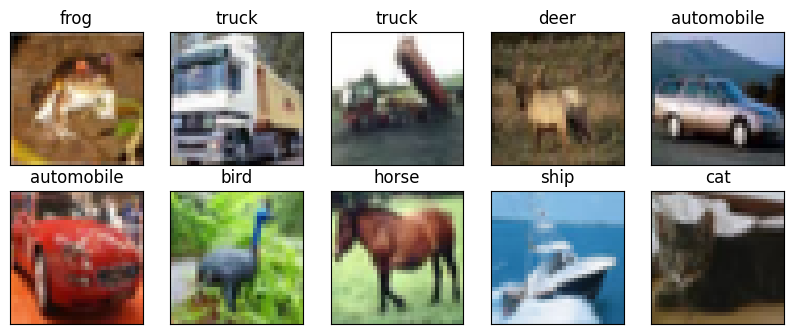

In [ ]:
# Visualize data
# Define class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display each category
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.title(class_names[y_train[i][0]])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)

In [ ]:
# Dataset shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Implement CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Initiate model
model = Sequential()

# Add layers
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3))) # Input layer
model.add(MaxPooling2D(pool_size=(2,2))) # 2nd layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu')) # 3rd layer
model.add(MaxPooling2D(pool_size=(2,2))) # 4th layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu')) # 5th layer
model.add(Flatten()) # 6th layer - Flatten layer
model.add(Dense(64, activation='relu')) # 7th layer
model.add(Dense(10, activation='softmax')) # Final layer outputs estimated probabilities (softmax onverts output to probabilites)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,058 (258.04 KB)

 Trainable params: 66,058 (258.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1992 - loss: 2.6480 - val_accuracy: 0.3686 - val_loss: 1.7091
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3902 - loss: 1.6553 - val_accuracy: 0.4329 - val_loss: 1.5431
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4607 - loss: 1.4896 - val_accuracy: 0.4666 - val_loss: 1.4758
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4988 - loss: 1.3977 - val_accuracy: 0.4931 - val_loss: 1.4061
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5294 - loss: 1.3120 - val_accuracy: 0.5080 - val_loss: 1.3885
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5452 - loss: 1.2620 - val_accuracy: 0.5226 - val_loss: 1.3506
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5767 - loss: 1.1801 - val_accuracy: 0.5471 - val_loss: 1.2903
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5977 - loss: 1.1409 - val_accuracy: 0

**Part b**

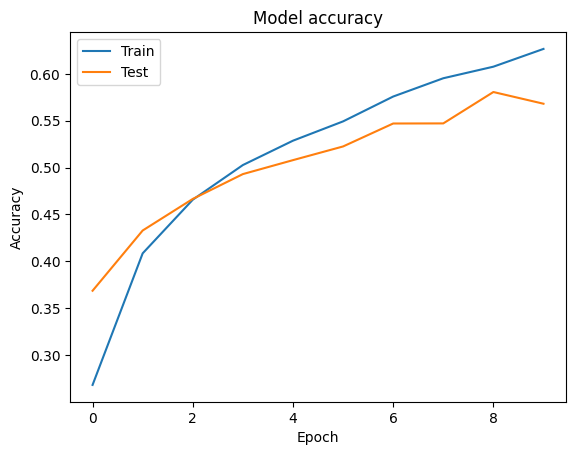

In [ ]:
# Plot training and validation accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
# Calculate accuracy of training vs validation set
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)

Training accuracy: 0.6266999840736389
Validation accuracy: 0.5681999921798706


# Question 2

In [ ]:
# Impoort Wisconsin breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Create datframe for easier feature selection
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Limit to selected features
selected_features = ['worst compactness','worst concavity', 'worst area']

# Split data into features and targets (with only wanted features)
X = df[selected_features] # features
y = cancer.target # targets

In [ ]:
print(X.shape)
print(y.shape)

(569, 3)
(569,)


**Part a**

In [ ]:
# Accuracy of classification model with linear kernel
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create SVC object with linear kernal
model = SVC(kernel='linear')

# Train model
model.fit(X_train, y_train)

# Predict with model
y_pred = model.predict(X_test)

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for model with linear kernal:", accuracy)

Accuracy for model with linear kernal: 0.9649122807017544


**Part b**

In [ ]:
# Create SVC object with radial basis function kernal
model = SVC(kernel='rbf', C=2)

# Train model
model.fit(X_train, y_train)

# Predict with model
y_pred = model.predict(X_test)

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for model with radial basis function kernal:", accuracy)

Accuracy for model with radial basis function kernal: 0.9473684210526315
